<a href="https://colab.research.google.com/github/yoon777/cv_project/blob/main/data_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!sudo apt install tesseract-ocr
!sudo apt-get install tesseract-ocr-kor
!pip install pytesseract
!pip install pypdf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-kor
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,052 kB of archives.
After this operation, 1,693 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-kor all 1:4.00~git30-7274cfa-1.1 [1,052 kB]
Fetched 1,052 kB in 1s (1,027 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize fro

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pytesseract
import pypdf

6066


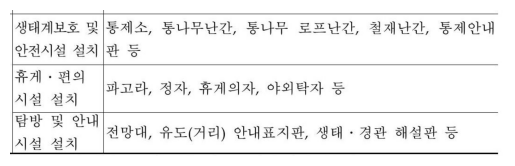

In [3]:
# 이미지 파일이 저장된 경로
image_dir = '/content/drive/MyDrive/CV_project/train_raw'

# 이미지 파일 리스트 불러오기
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
print(len(image_files))

# 첫 번째 이미지 불러오기
first_image_path = os.path.join(image_dir, image_files[0])
image = Image.open(first_image_path)

# 이미지 출력
plt.imshow(image)
plt.axis('off')  # 축 숨기기
plt.show()

In [4]:
# 이미지 파일 리스트 불러오기
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

# 최대 및 최소 이미지 크기 초기화 (면적으로 비교)
max_size = (0, 0)
min_size = (float('inf'), float('inf'))
max_area = 0
min_area = float('inf')

# 이미지 크기 정보를 저장할 리스트
widths = []
heights = []

# 이미지 개수
total_images = len(image_files)

# 이미지 크기 비교 및 업데이트
for i, image_file in enumerate(tqdm(image_files)):
    image_path = os.path.join(image_dir, image_file)
    img = cv2.imread(image_path)
    height, width, channels = img.shape
    area = width * height

    if area > max_area:
        max_size = (width, height)
        max_area = area

    if area < min_area:
        min_size = (width, height)
        min_area = area

    widths.append(width)
    heights.append(height)

# 최대 및 최소 이미지 크기 출력
print(f"최대 이미지 크기: {max_size}")
print(f"최소 이미지 크기: {min_size}")

100%|██████████| 6066/6066 [04:19<00:00, 23.38it/s]

최대 이미지 크기: (2933, 2149)
최소 이미지 크기: (362, 179)


In [5]:
# pandas 데이터프레임으로 변환
df = pd.DataFrame({
    'file_name': image_files,
    'width': widths,
    'height': heights
})

# 기본 통계량 출력
print(df.describe())

             width       height
count  6066.000000  6066.000000
mean   1062.622816   598.614573
std     232.262530   337.769073
min     292.000000   115.000000
25%     952.000000   363.000000
50%    1086.000000   506.000000
75%    1211.000000   727.000000
max    2933.000000  2520.000000


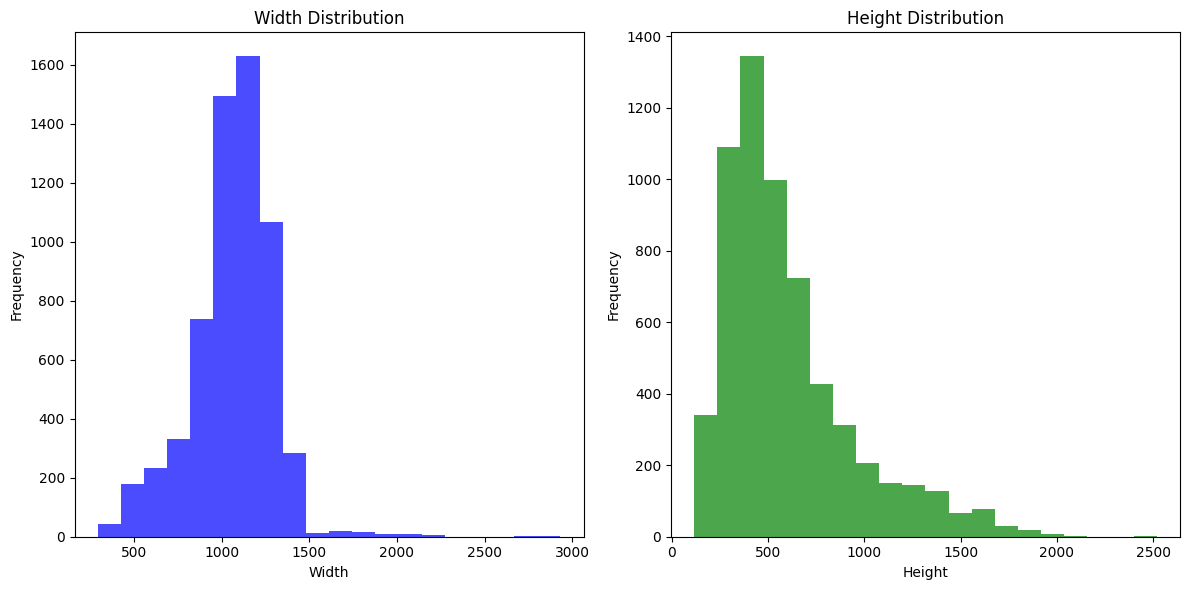

In [6]:
# 너비와 높이에 대한 히스토그램
plt.figure(figsize=(12, 6))

# 너비 분포
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='blue', alpha=0.7)
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

# 높이 분포
plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='green', alpha=0.7)
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

count    6066.000000
mean        2.289895
std         1.230269
min         0.232153
25%         1.388715
50%         2.072845
75%         2.909626
max        11.508982
Name: aspect_ratio, dtype: float64


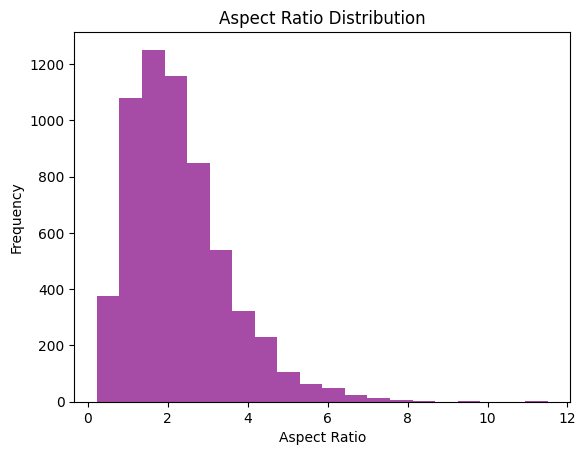

In [7]:
# 가로 세로 비율 계산
df['aspect_ratio'] = df['width'] / df['height']

# 가로 세로 비율의 기본 통계량 출력
print(df['aspect_ratio'].describe())

# 가로 세로 비율 히스토그램
plt.hist(df['aspect_ratio'], bins=20, color='purple', alpha=0.7)
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.show()

In [8]:
# 정사각형에 가까운 이미지 필터링 (가로 세로 비율이 1.0에 가까운)
square_images = df[(df['aspect_ratio'] >= 0.9) & (df['aspect_ratio'] <= 1.1)]

print(f"정사각형에 가까운 이미지 수: {len(square_images)}")
print(square_images)

정사각형에 가까운 이미지 수: 355
                       file_name  width  height  aspect_ratio
10    T02_C01_61002_1077_108.jpg   1189    1289      0.922420
38    T02_C01_61002_1439_161.jpg    500     502      0.996016
76    T02_C01_61002_1723_045.jpg   1049     961      1.091571
79    T02_C01_61003_1179_050.jpg    544     570      0.954386
136   T02_C01_61003_1207_097.jpg   1225    1285      0.953307
...                          ...    ...     ...           ...
5988  T02_C01_50010_1293_517.jpg    919     943      0.974549
6006  T02_C01_50001_1571_023.jpg    907     967      0.937952
6028  T02_C01_50002_1192_100.jpg   1127    1032      1.092054
6029   T02_C01_50000_1346_19.jpg   1419    1312      1.081555
6064  T02_C01_50003_1593_016.jpg    656     610      1.075410

[355 rows x 4 columns]


count    6.066000e+03
mean     6.483642e+05
std      4.363720e+05
min      6.479800e+04
25%      3.599382e+05
50%      5.254145e+05
75%      7.942975e+05
max      6.303017e+06
Name: resolution, dtype: float64


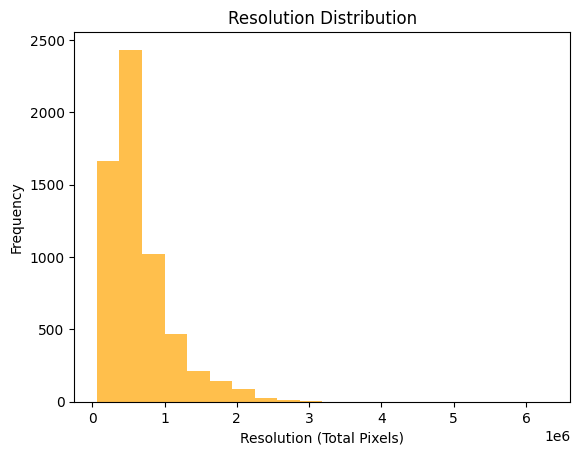

In [9]:
# 해상도(총 픽셀 수) 계산
df['resolution'] = df['width'] * df['height']

# 해상도의 기본 통계량 출력
print(df['resolution'].describe())

# 해상도 분포 히스토그램
plt.hist(df['resolution'], bins=20, color='orange', alpha=0.7)
plt.title('Resolution Distribution')
plt.xlabel('Resolution (Total Pixels)')
plt.ylabel('Frequency')
plt.show()

In [36]:
def preprocess_image(image):
    """이미지 전처리: 대비 조정 및 노이즈 제거"""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # 그레이스케일로 변환
    blur = cv2.GaussianBlur(gray, (5, 5), 0)  # 가우시안 블러로 노이즈 제거
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # Otsu thresholding
    return thresh


def detect_grid(
    img,
    kernel_size=5,
    dist=5 / 100,
    canny_th_low=50,
    canny_th_high=150,
    rho=1,
    theta=np.pi / 180,
    threshold=15,
    min_length_line=50,
    max_length_gap=20,
):
    """Perform the automatic grid detection and returns all the ROI

    Parameters
    ----------
    img : np.array
        image of the grid to be detected
    kernel_size : int, optional
        kernel size of the Gaussian Blur applied for denoizing, by default 5
    dist : float, optional
        distance threshold for line grouping (relative to the image's size), by default 5/100
    canny_th_low : int, optional
        low threshold for OpenCV's contour detection function (see official documentation, link below), by default 50
    canny_th_high : int, optional
        high threshold for OpenCV's contour detection function (see official documentation, link below), by default 150
    rho : int, optional
        parameter of OpenCV's Hough transform function (see official documentation, link below), by default 1
    theta : [type], optional
        parameter of OpenCV's Hough transform function (see official documentation, link below), by default np.pi/180
    threshold : int, optional
        parameter of OpenCV's Hough transform function (see official documentation, link below), by default 15
    min_length_line : int, optional
        parameter of OpenCV's Hough transform function (see official documentation, link below), by default 50
    max_length_gap : int, optional
        parameter of OpenCV's Hough transform function (see official documentation, link below), by default 20

    OpenCV's documentation for Canny function : https://www.docs.opencv.org/master/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de
    OpenCV's documentation for Hough Transform function : https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga8618180a5948286384e3b7ca02f6feeb
    Returns
    -------
    np.array, array
        array of the detected ROI and an array containing the number of lines and rows
    """
    image = img.copy()
    h, w = image.shape[:2]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # denoize
    image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    edges = cv2.Canny(image, canny_th_low, canny_th_high)

    # Run Hough on edge detected image
    lines = cv2.HoughLinesP(
        edges, rho, theta, threshold, np.array([]), min_length_line, max_length_gap
    )

    hori, vert = [], []
    for line in lines:
        for x1, y1, x2, y2 in line:
            if np.abs(x1 - x2) < dist * w:
                vert.append((x1 + x2) // 2)
            elif np.abs(y1 - y2) < dist * h:
                hori.append((y1 + y2) // 2)

    hori, vert = dedupe(hori, dist * h), dedupe(vert, dist * w)

    intersections = []
    for y in hori:
        o1, p1 = (0, y), (w, y)
        temp = []
        for x in vert:
            o2, p2 = (x, 0), (x, h)
            temp.append(intersection(o1, p1, o2, p2))
        intersections.append(temp)

    boxes = []
    for i in range(len(intersections) - 1):
        for j in range(1, len(intersections[i])):
            a = intersections[i][j - 1]
            b = intersections[i + 1][j]
            box = (a, b)
            boxes.append(box)

    return boxes, [len(hori) - 1, len(vert) - 1]

def dedupe(pts, thresh):
    """Eliminates redundant lines: points are grouped by distance and the first point is used as representative

    Parameters
    ----------
    pts : array
        array of points to be grouped
    thresh : float
        distance threshold below which two points are grouped

    Returns
    -------
    array
        array of representatives of the groups
    """
    pts = sorted(pts)

    i = 0
    while i < len(pts) - 1:
        if np.abs(pts[i] - pts[i + 1]) < thresh:
            pts.pop(i + 1)
            continue
        i += 1

    return pts


def intersection(o1, p1, o2, p2):
    """Returns the intersection between two lines (o1, p1) and (o2, p2)

    Parameters
    ----------
    o1 : int
        (x,y) coordinates of the beginning of the first line
    p1 : int
        (x,y) coordinates of the end of the first line
    o2 : int
        (x,y) coordinates of the beginning of the second line
    p2 : int
        (x,y) coordinates of the end of the second line

    Returns
    -------
    array
        (x,y) coordinates of the intersection of the two lines
    """
    o1, p1 = np.array(o1), np.array(p1)
    o2, p2 = np.array(o2), np.array(p2)

    x = o2 - o1
    d1 = p1 - o1
    d2 = p2 - o2

    cross = d1[0] * d2[1] - d1[1] * d2[0]

    if abs(cross) < 1e-8:
        return None

    t1 = (x[0] * d2[1] - x[1] * d2[0]) / cross
    inter = o1 + d1 * t1
    return (int(inter[0]), int(inter[1]))

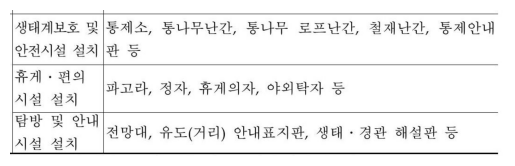

        0      1      2          3            4              5    6
0      00                                                          
1    24 더  731 터      개     두 구 스다         니그 7       도 난 근간 1  고 7
2            1 1         7000 그  4       1 니 느리            시 1  느 느
3      난소     시쏟     걷지        건 ㅠ                                 
4       0    0 고      0      00000                                 
5    구는 1      1    그 은                                            
6                         이 7 골트 자     고으 판 고 2         Ｌ 0 다구    해
7       1                    717 보    124 더 자 7  10 00 의 이 이 이    로
8     1 1      는      기                                            
9   근 고 호   논고 길  시기 오도      00000                                 
10   가기 건      0     나드                                            
11                            저 따나     ㄴㄴ 기근노 아   1040 년 구 가 2   더블
12      1      1              5 지기  도 그 717 0 느      자극느 이 1느기     
13    1 는    1 근                                

In [37]:
import warnings
import re

def clean_text(text):
    """특수 문자와 불필요한 공백 제거"""
    text = re.sub(r'\n+', ' ', text)  # 여러 개의 줄바꿈을 하나로
    text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 제거
    return text.strip()


# 경고 메시지 무시
warnings.filterwarnings("ignore")

# 이미지 읽기
img_path = os.path.join(image_dir, image_files[0])  # 첫 번째 이미지 선택
img = Image.open(img_path)  # PIL 이미지로 열기
img_cv2 = cv2.imread(img_path)  # OpenCV 이미지로 열기 (그리드 검출용)

# 이미지 출력 (원본 이미지 시각화)
plt.imshow(img)
plt.axis('off')  # 축 숨기기
plt.show()

# 그리드 검출 (detect_grid 함수 사용)
boxes, grid_shape = detect_grid(img_cv2)  # 각 셀의 좌표와 그리드 형태 추출

# 셀 내 텍스트 추출 및 DataFrame 생성
data = []

# 각 셀을 순회하면서 텍스트 추출
for (pt1, pt2) in boxes:
    # 좌표 추출
    x1, y1 = pt1
    x2, y2 = pt2

    # 각 셀 영역 자르기 (ROI: Region of Interest)
    roi = img_cv2[y1:y2, x1:x2]

    # 이미지 전처리 적용
    roi_preprocessed = preprocess_image(roi)

    # OCR로 셀 내 텍스트 추출
    custom_config = r'--oem 3 --psm 6'  # OCR 엔진 모드와 페이지 세분화 모드 설정
    cell_text = pytesseract.image_to_string(roi_preprocessed, config=custom_config, lang='kor').strip()

    # OCR로 추출된 텍스트 후처리
    cell_text = clean_text(cell_text)

    # 추출된 텍스트 추가
    data.append(cell_text)

# 추출된 텍스트를 그리드 형태에 맞게 2D 리스트로 변환
rows = []
for i in range(0, len(data), grid_shape[1]):
    row = data[i:i + grid_shape[1]]
    rows.append(row)

# pandas DataFrame으로 변환
df = pd.DataFrame(rows)

# DataFrame 출력
print(df)